In [79]:
import warnings
warnings.filterwarnings("ignore")  # To suppress any warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier



#DEEP LEARNING
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout



In [80]:
original_df = pd.read_csv("american_bankruptcy.csv")
original_df.head(10)

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
5,C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,...,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
6,C_1,alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,...,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
7,C_1,alive,2006,645.721,837.171,32.199,118.907,342.593,58.660,181.691,...,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
8,C_1,alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,...,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397
9,C_1,alive,2008,851.312,1110.677,40.551,166.080,477.424,78.651,227.300,...,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


In [81]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [82]:
bankruptcy_counts = original_df['status_label'].value_counts()

In [83]:
print(bankruptcy_counts)

status_label
alive     73462
failed     5220
Name: count, dtype: int64


In [84]:
original_df.shape

(78682, 21)

The dataset has 78682 rows and 21 columns(Financial ratios)

In [85]:
original_df.isnull().mean()

company_name    0.0
status_label    0.0
year            0.0
X1              0.0
X2              0.0
X3              0.0
X4              0.0
X5              0.0
X6              0.0
X7              0.0
X8              0.0
X9              0.0
X10             0.0
X11             0.0
X12             0.0
X13             0.0
X14             0.0
X15             0.0
X16             0.0
X17             0.0
X18             0.0
dtype: float64

There are no null values in the dataset

## EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Bankruptcy Distribution')

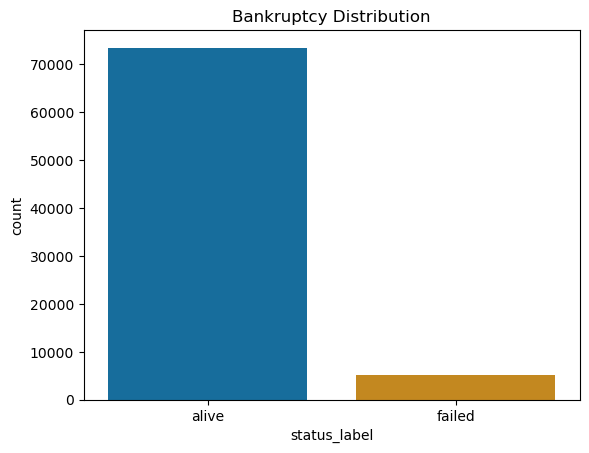

In [86]:
sns.countplot(x=original_df['status_label'],palette='colorblind')
plt.title('Bankruptcy Distribution')

The dataset is highly unbalanced

### Impact of Assets on Bankruptcy

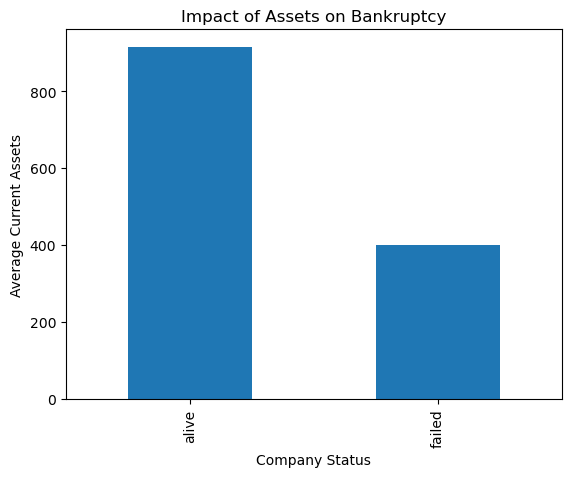

In [87]:
asset_status_bar = original_df.groupby('status_label')['X1'].mean()
asset_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average Current Assets')
plt.title('Impact of Assets on Bankruptcy')
plt.show()

### Impact of Depreciation and Ammortization on Bankruptcy

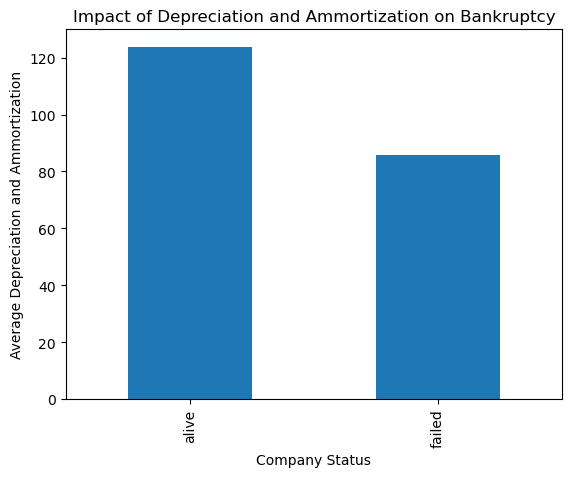

In [88]:
dep_and_am_status_bar = original_df.groupby('status_label')['X3'].mean()
dep_and_am_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average Depreciation and Ammortization')
plt.title('Impact of Depreciation and Ammortization on Bankruptcy')
plt.show()

Alive companies have higher depreciation on tangible and intangible assets

### Impact of EBITDA on Bankruptcy

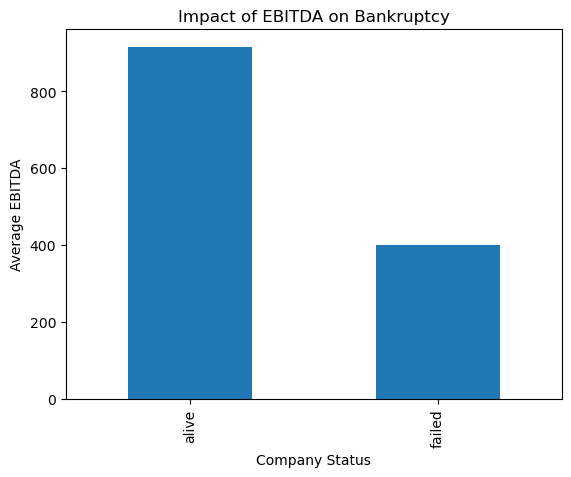

In [89]:
EBITDA_status_bar = original_df.groupby('status_label')['X4'].mean()
asset_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average EBITDA')
plt.title('Impact of EBITDA on Bankruptcy')
plt.show()

### Impact of Inventory on Bankruptcy

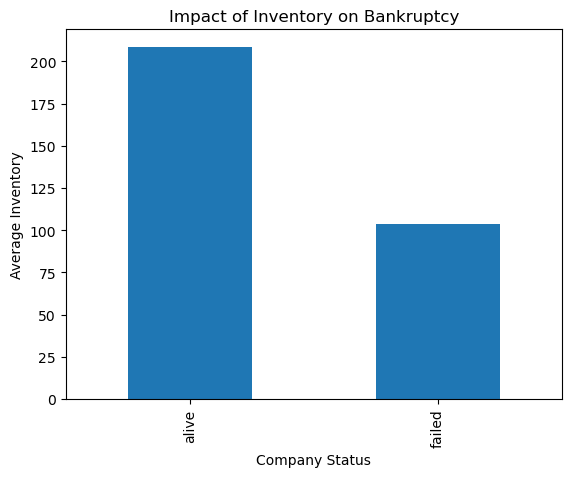

In [90]:
inventory_status_bar = original_df.groupby('status_label')['X5'].mean()
inventory_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average Inventory')
plt.title('Impact of Inventory on Bankruptcy')
plt.show()

### Impact of Net Income on Bankruptcy

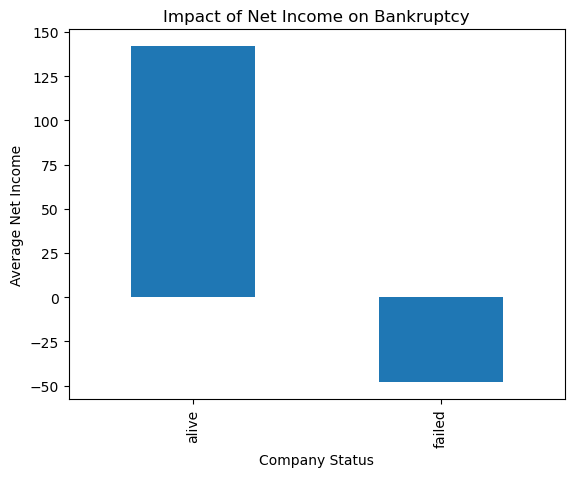

In [91]:
inventory_status_bar = original_df.groupby('status_label')['X6'].mean()
inventory_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average Net Income')
plt.title('Impact of Net Income on Bankruptcy')
plt.show()

Failed Companies have a negative net income. Alive companies have a positive net income

### Impact of Receivables balance on Bankruptcy

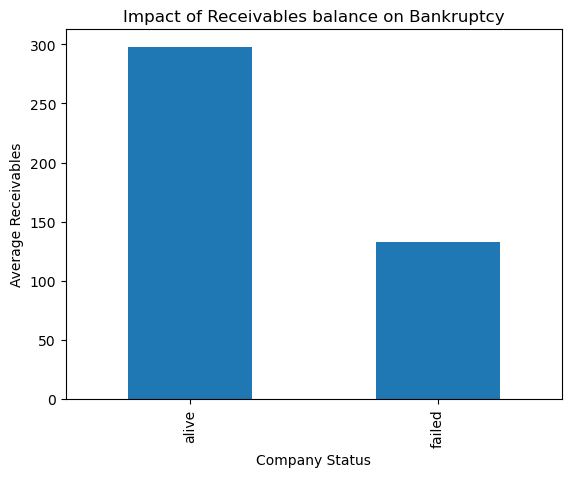

In [92]:
receivables_status_bar = original_df.groupby('status_label')['X7'].mean()
receivables_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average Receivables')
plt.title('Impact of Receivables balance on Bankruptcy')
plt.show()

Alive companies have higher receivables than failed companies

### Impact of Market Value on Bankruptcy

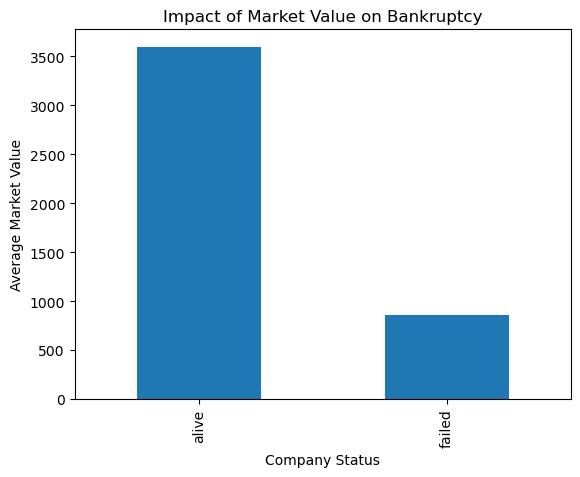

In [93]:
mktvalue_status_bar = original_df.groupby('status_label')['X8'].mean()
mktvalue_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average Market Value')
plt.title('Impact of Market Value on Bankruptcy')
plt.show()

Failed companies have a significantly lower market value

### Impact of Market Value on Bankruptcy

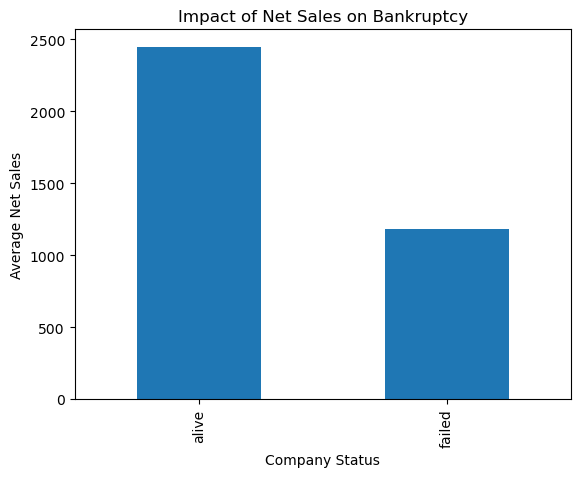

In [94]:
netsales_status_bar = original_df.groupby('status_label')['X9'].mean()
netsales_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Average Net Sales')
plt.title('Impact of Net Sales on Bankruptcy')
plt.show()

### Impact of Assets on Bankruptcy

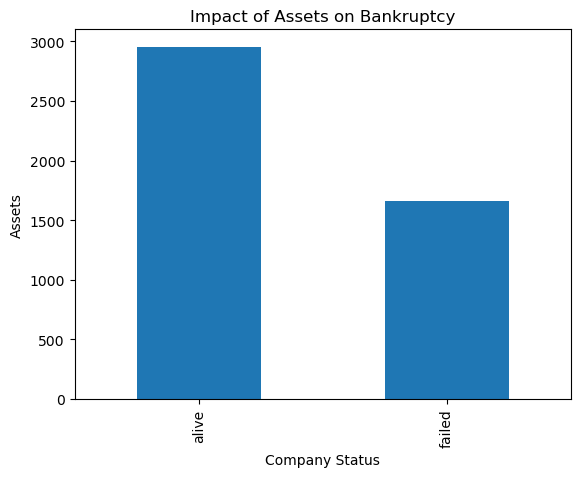

In [95]:
assets_status_bar = original_df.groupby('status_label')['X10'].mean()
assets_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Assets')
plt.title('Impact of Assets on Bankruptcy')
plt.show()

### Impact of long-term debt on bankruptcy

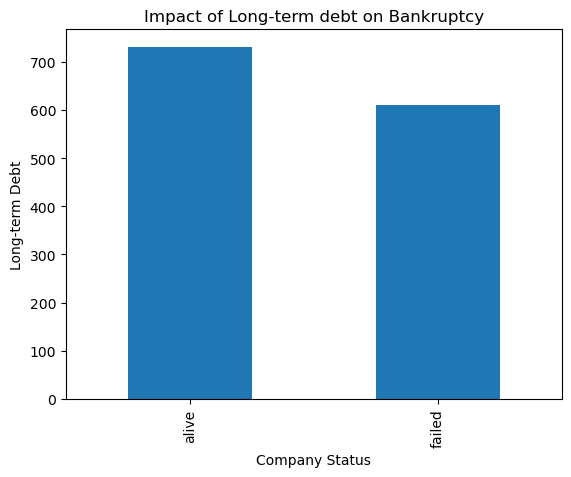

In [96]:
ltd_status_bar = original_df.groupby('status_label')['X11'].mean()
ltd_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Long-term Debt')
plt.title('Impact of Long-term debt on Bankruptcy')
plt.show()

### Impact of EBIT on bankruptcy

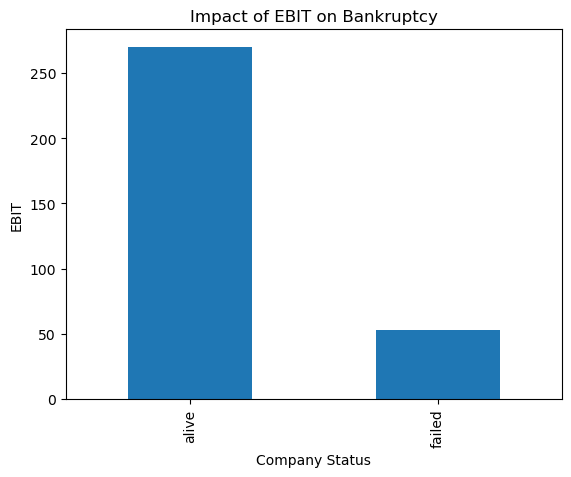

In [97]:
ebit_status_bar = original_df.groupby('status_label')['X12'].mean()
ebit_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('EBIT')
plt.title('Impact of EBIT on Bankruptcy')
plt.show()

### Impact of Gross Profit on Bankruptcy

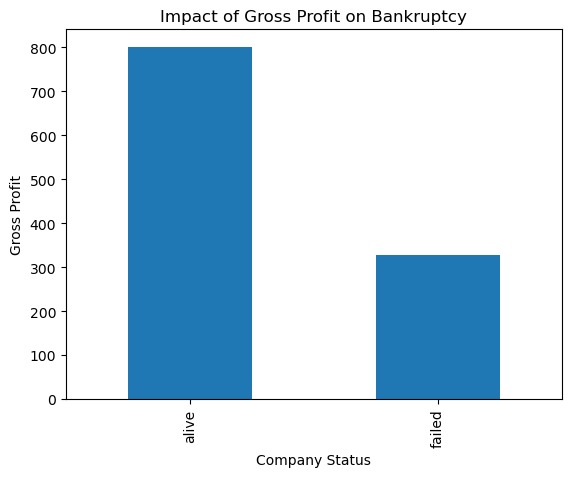

In [98]:
gross_status_bar = original_df.groupby('status_label')['X13'].mean()
gross_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Gross Profit')
plt.title('Impact of Gross Profit on Bankruptcy')
plt.show()

### Impact of Current Liabilities on bankruptcy

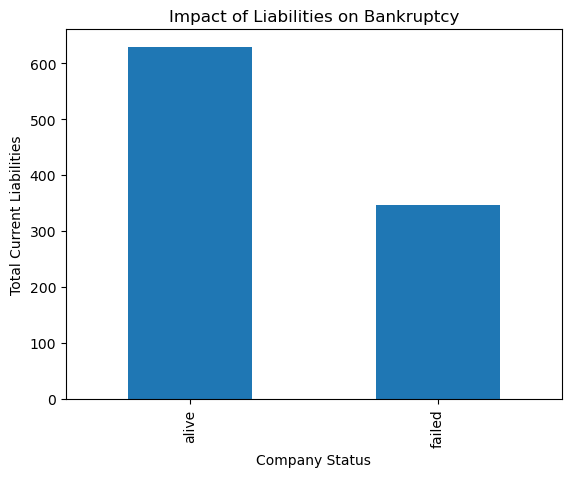

In [99]:
liabilities_status_bar = original_df.groupby('status_label')['X14'].mean()
liabilities_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Total Current Liabilities')
plt.title('Impact of Liabilities on Bankruptcy')
plt.show()

### Impact of retained earnings in bankruptcy

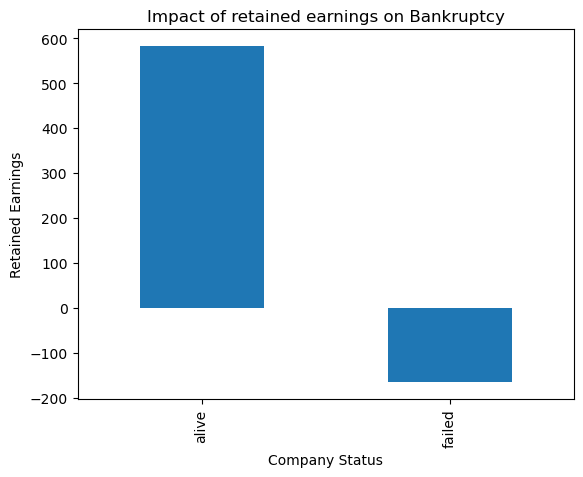

In [100]:
retained_status_bar = original_df.groupby('status_label')['X15'].mean()
retained_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Retained Earnings')
plt.title('Impact of retained earnings on Bankruptcy')
plt.show()

### impact of revenue on Bankruptcy

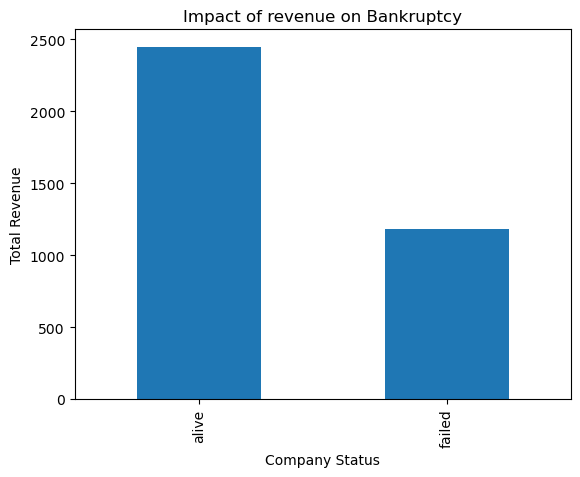

In [101]:
revenue_status_bar = original_df.groupby('status_label')['X16'].mean()
revenue_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Total Revenue')
plt.title('Impact of revenue on Bankruptcy')
plt.show()

### Impact of Total Liabilities on Bankruptcy

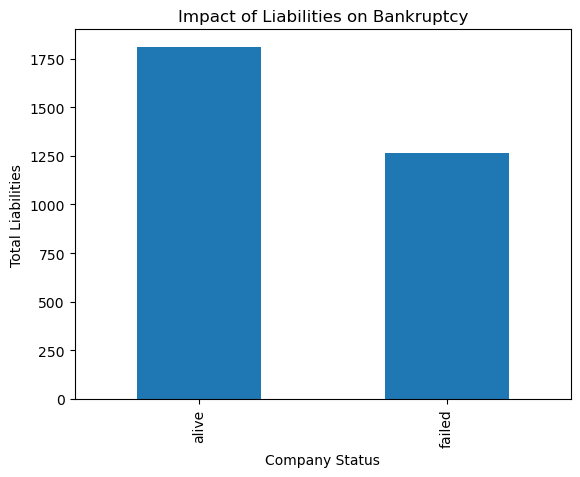

In [102]:
liabilities_status_bar = original_df.groupby('status_label')['X17'].mean()
liabilities_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Total Liabilities')
plt.title('Impact of Liabilities on Bankruptcy')
plt.show()

### Impact of Operating Expenses on Bankruptcy

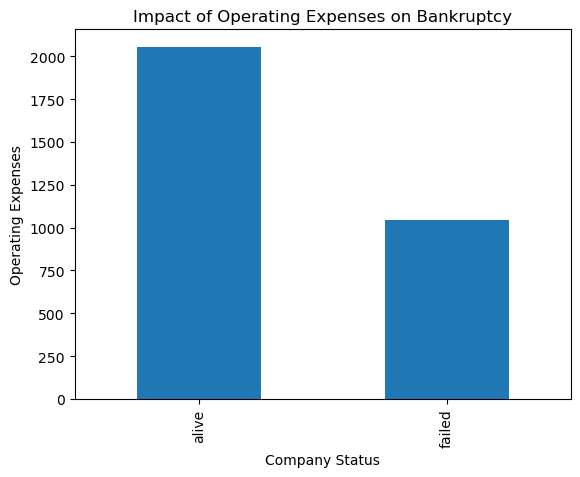

In [103]:
operexpenses_status_bar = original_df.groupby('status_label')['X18'].mean()
operexpenses_status_bar.plot(kind='bar')
plt.xlabel('Company Status')
plt.ylabel('Operating Expenses')
plt.title('Impact of Operating Expenses on Bankruptcy')
plt.show()

# FEATURE SELECTION

In [104]:
original_df['status_label'] = original_df['status_label'].replace({'alive': 1, 'failed': 0})

In [105]:
original_df = original_df.drop('company_name', axis=1)

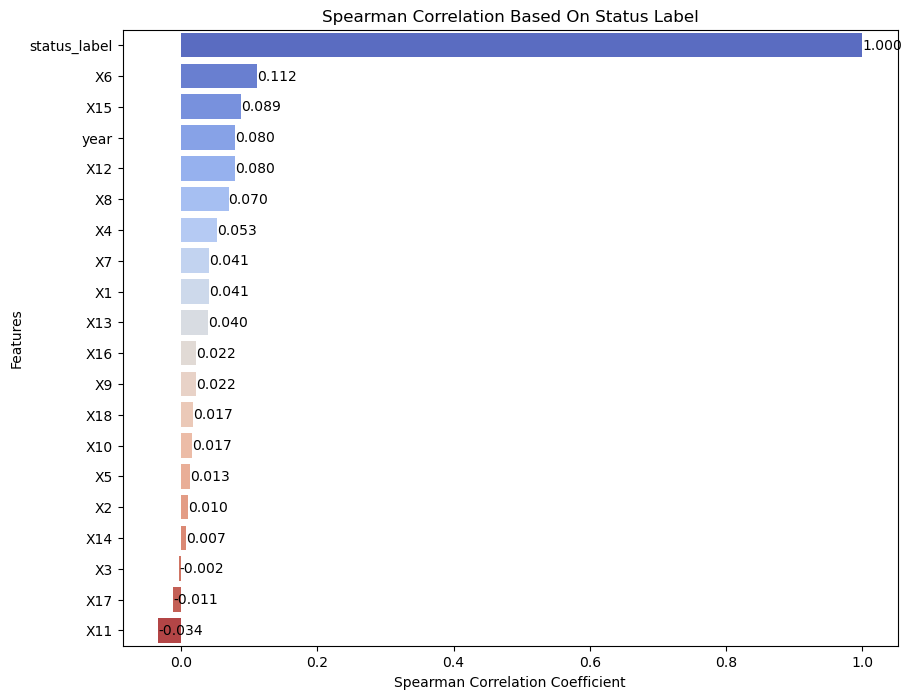

In [106]:
corr = original_df.corrwith(original_df['status_label'], method='spearman').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')

# This here annotates each bar with its correlation value
for i, v in enumerate(corr.values):
    plt.text(v, i, f"{v:.3f}", color='black', va='center')

plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('Features')
plt.title('Spearman Correlation Based On Status Label')
plt.show()

In [107]:
original_df.corr(method = 'spearman')

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
status_label,1.000000,0.079905,0.040897,0.010125,-0.002195,0.053183,0.012868,0.111625,0.041119,0.069889,0.022209,0.016645,-0.033794,0.079592,0.039990,0.007285,0.088634,0.022209,-0.011264,0.017398
year,0.079905,1.000000,0.145821,0.112568,0.101254,0.109592,0.058718,0.080545,0.106854,0.177425,0.119190,0.145604,0.084471,0.099786,0.130112,0.141093,-0.003163,0.119190,0.147196,0.128189
X1,0.040897,0.145821,1.000000,0.900667,0.887007,0.753038,0.656953,0.492247,0.898713,0.888003,0.923246,0.959776,0.636717,0.661171,0.884686,0.931990,0.431128,0.923246,0.905944,0.939060
X2,0.010125,0.112568,0.900667,1.000000,0.884771,0.788463,0.692319,0.506352,0.881963,0.771508,0.966225,0.910617,0.694021,0.697961,0.862028,0.920428,0.474847,0.966225,0.906944,0.977995
X3,-0.002195,0.101254,0.887007,0.884771,1.000000,0.785600,0.593776,0.448601,0.860419,0.822855,0.917691,0.948960,0.734207,0.650193,0.886748,0.916855,0.402731,0.917691,0.931712,0.912714
X4,0.053183,0.109592,0.753038,0.788463,0.785600,1.000000,0.583718,0.746604,0.790786,0.724691,0.852238,0.802506,0.637993,0.941066,0.883694,0.773716,0.608419,0.852238,0.780055,0.787262
X5,0.012868,0.058718,0.656953,0.692319,0.593776,0.583718,1.000000,0.415036,0.618280,0.513546,0.692992,0.619446,0.495927,0.537230,0.651828,0.626304,0.445812,0.692992,0.605429,0.689768
X6,0.111625,0.080545,0.492247,0.506352,0.448601,0.746604,0.415036,1.000000,0.518358,0.538957,0.563817,0.500947,0.345275,0.821636,0.607786,0.472737,0.660649,0.563817,0.455031,0.499669
X7,0.041119,0.106854,0.898713,0.881963,0.860419,0.790786,0.618280,0.518358,1.000000,0.786608,0.920353,0.898535,0.664429,0.702990,0.883246,0.899796,0.465273,0.920353,0.880365,0.905252
X8,0.069889,0.177425,0.888003,0.771508,0.822855,0.724691,0.513546,0.538957,0.786608,1.000000,0.812050,0.891572,0.577302,0.655680,0.817070,0.825709,0.429184,0.812050,0.815634,0.820901


In [108]:
original_df = original_df.drop(['X14','X3','X12','X16'], axis=1)

In [109]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  78682 non-null  int64  
 1   year          78682 non-null  int64  
 2   X1            78682 non-null  float64
 3   X2            78682 non-null  float64
 4   X4            78682 non-null  float64
 5   X5            78682 non-null  float64
 6   X6            78682 non-null  float64
 7   X7            78682 non-null  float64
 8   X8            78682 non-null  float64
 9   X9            78682 non-null  float64
 10  X10           78682 non-null  float64
 11  X11           78682 non-null  float64
 12  X13           78682 non-null  float64
 13  X15           78682 non-null  float64
 14  X17           78682 non-null  float64
 15  X18           78682 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 9.6 MB


In [110]:
X = original_df.drop(columns=['status_label'])  
y = original_df['status_label']  

### UNSAMPLED DATA

In [111]:
unsampled_X_train, unsampled_X_test, unsampled_y_train, unsampled_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### UNSAMPLED XGBOOST

In [112]:
unsampled_xgboost_model = xgb.XGBClassifier(n_estimators = 100,
                                            max_depth = 10,
                                            learning_rate = 0.1,
                                            random_state = 42)
unsampled_xgboost_model.fit(unsampled_X_train, unsampled_y_train)
y_pred = unsampled_xgboost_model.predict(unsampled_X_test)
accuracy = accuracy_score(unsampled_y_test, y_pred)
print(classification_report(unsampled_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.10      0.17      1614
           1       0.94      1.00      0.97     21991

    accuracy                           0.94     23605
   macro avg       0.88      0.55      0.57     23605
weighted avg       0.93      0.94      0.91     23605



## UNSAMPLED RANDOM FOREST

In [113]:
unsampled_rf_model = RandomForestClassifier(n_estimators = 50,
                                            max_depth = 10,
                                            random_state = 42)
unsampled_rf_model.fit(unsampled_X_train, unsampled_y_train)
y_pred = unsampled_rf_model.predict(unsampled_X_test)
accuracy = accuracy_score(unsampled_y_test, y_pred)
print(classification_report(unsampled_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.01      0.02      1614
           1       0.93      1.00      0.96     21991

    accuracy                           0.93     23605
   macro avg       0.93      0.50      0.49     23605
weighted avg       0.93      0.93      0.90     23605



# UNSAMPLED LSTM MODEL

In [114]:
unsampled_X_train_array = unsampled_X_train.to_numpy()
reshaped_X_train = unsampled_X_train_array.reshape((unsampled_X_train_array.shape[0], unsampled_X_train_array.shape[1], 1))

In [115]:
unsampled_lstm_model = Sequential()
unsampled_lstm_model.add(LSTM(units=70, input_shape=(reshaped_X_train.shape[1], 1), return_sequences=True))
unsampled_lstm_model.add(Dropout(0.2))
unsampled_lstm_model.add(LSTM(units=70, return_sequences=True))
unsampled_lstm_model.add(Dropout(0.2))
unsampled_lstm_model.add(LSTM(units=70))
unsampled_lstm_model.add(Dropout(0.2))
unsampled_lstm_model.add(Dense(32, activation='relu'))
unsampled_lstm_model.add(Dense(1, activation='sigmoid'))

unsampled_lstm_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
unsampled_lstm_model.fit(reshaped_X_train, unsampled_y_train, epochs=5, batch_size=32, verbose=1)
predictions = unsampled_lstm_model.predict(unsampled_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(unsampled_y_test, predicted_labels)
print(report)


Epoch 1/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4019s 2s/step - accuracy: 0.9297 - loss: 0.2513
Epoch 2/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1263s 734ms/step - accuracy: 0.9340 - loss: 0.2383
Epoch 3/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1381s 802ms/step - accuracy: 0.9342 - loss: 0.2350
Epoch 4/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 254s 147ms/step - accuracy: 0.9346 - loss: 0.2327
Epoch 5/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 3239s 2s/step - accuracy: 0.9334 - loss: 0.2340
738/738 ━━━━━━━━━━━━━━━━━━━━ 1114s 2s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1614
           1       0.93      1.00      0.96     21991

    accuracy                           0.93     23605
   macro avg       0.47      0.50      0.48     23605
weighted avg       0.87      0.93      0.90     23605



# UNSAMPLED CNN MODEL

In [116]:
unsampled_X_train_array = unsampled_X_train.to_numpy()
reshaped_X_train = unsampled_X_train_array.reshape((unsampled_X_train_array.shape[0], unsampled_X_train_array.shape[1], 1))
unsampled_cnn_model = Sequential()
unsampled_cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(unsampled_X_train_array.shape[1], 1)))
unsampled_cnn_model.add(MaxPooling1D(pool_size=2))
unsampled_cnn_model.add(Flatten())
unsampled_cnn_model.add(Dense(64, activation='relu'))
unsampled_cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

unsampled_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
unsampled_cnn_model.fit(reshaped_X_train, unsampled_y_train, epochs=5, batch_size=32, verbose=1)
predictions = unsampled_cnn_model.predict(unsampled_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(unsampled_y_test, predicted_labels)
print(report)

Epoch 1/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8719 - loss: 12.5588
Epoch 2/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9112 - loss: 2.0384
Epoch 3/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9180 - loss: 0.7211
Epoch 4/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9269 - loss: 0.4424
Epoch 5/5
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9303 - loss: 0.3089
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       0.50      0.01      0.02      1614
           1       0.93      1.00      0.96     21991

    accuracy                           0.93     23605
   macro avg       0.72      0.51      0.49     23605
weighted avg       0.90      0.93      0.90     23605



## SMOTE

In [117]:
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X, y)

In [118]:
print('Oversampled Training data: ', smote_X.shape)
print('Oversampled Testing data: ', smote_y.shape)

Oversampled Training data:  (146924, 15)
Oversampled Testing data:  (146924,)


There are equal number of bankrupt and alive companies

In [119]:
smote_X_train, smote_X_test, smote_y_train, smote_y_test = train_test_split(smote_X, smote_y, test_size=0.2, random_state=42)

## SMOTE-XGBOOST MODEL

In [120]:
smote_xgboost_model = xgb.XGBClassifier(n_estimators = 100, 
                                        max_depth = 10,
                                        learning_rate = 0.1,
                                        random_state = 42)
smote_xgboost_model.fit(smote_X_train, smote_y_train)
y_pred = smote_xgboost_model.predict(smote_X_test)
accuracy = accuracy_score(smote_y_test, y_pred)
print(classification_report(smote_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     14797
           1       0.94      0.86      0.89     14588

    accuracy                           0.90     29385
   macro avg       0.90      0.90      0.90     29385
weighted avg       0.90      0.90      0.90     29385



## SMOTE-RANDOM FOREST MODEL

In [121]:
smote_rf_model = RandomForestClassifier(n_estimators = 50, 
                                        max_depth = 10,
                                        random_state = 42)
smote_rf_model.fit(smote_X_train, smote_y_train)
y_pred = smote_rf_model.predict(smote_X_test)
accuracy = accuracy_score(smote_y_test, y_pred)
print(classification_report(smote_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82     14797
           1       0.86      0.74      0.79     14588

    accuracy                           0.81     29385
   macro avg       0.82      0.81      0.81     29385
weighted avg       0.82      0.81      0.81     29385



# SMOTE-LSTM MODEL

In [122]:
smote_X_train_array = smote_X_train.to_numpy()
reshaped_X_train = smote_X_train_array.reshape((smote_X_train_array.shape[0], smote_X_train_array.shape[1], 1))

In [123]:
smote_lstm_model = Sequential()
smote_lstm_model.add(LSTM(units=70, input_shape=(reshaped_X_train.shape[1], 1), return_sequences=True))
smote_lstm_model.add(Dropout(0.2))
smote_lstm_model.add(LSTM(units=70, return_sequences=True))
smote_lstm_model.add(Dropout(0.2))
smote_lstm_model.add(LSTM(units=70))
smote_lstm_model.add(Dropout(0.2))
smote_lstm_model.add(Dense(32, activation='relu'))
smote_lstm_model.add(Dense(1, activation='sigmoid'))

smote_lstm_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
smote_lstm_model.fit(reshaped_X_train, smote_y_train, epochs=30, batch_size=32, verbose=1)
predictions = smote_lstm_model.predict(smote_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(smote_y_test, predicted_labels)
print(report)


Epoch 1/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 4709s 1s/step - accuracy: 0.6153 - loss: 0.6522
Epoch 2/30
2978/3674 ━━━━━━━━━━━━━━━━━━━━ 2:04 179ms/step - accuracy: 0.6811 - loss: 0.6003

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



3674/3674 ━━━━━━━━━━━━━━━━━━━━ 2338s 636ms/step - accuracy: 0.7149 - loss: 0.5623
Epoch 4/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 2068s 563ms/step - accuracy: 0.7312 - loss: 0.5379
Epoch 5/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 396s 108ms/step - accuracy: 0.7473 - loss: 0.5122
Epoch 6/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 126s 34ms/step - accuracy: 0.7634 - loss: 0.4897
Epoch 7/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 106s 29ms/step - accuracy: 0.7755 - loss: 0.4691
Epoch 8/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 106s 29ms/step - accuracy: 0.7879 - loss: 0.4505
Epoch 9/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 106s 29ms/step - accuracy: 0.7993 - loss: 0.4298
Epoch 10/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 107s 29ms/step - accuracy: 0.8109 - loss: 0.4134
Epoch 11/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 106s 29ms/step - accuracy: 0.8151 - loss: 0.4041
Epoch 12/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 106s 29ms/step - accuracy: 0.8240 - loss: 0.3876
Epoch 13/30
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 106s 29ms/step - accuracy: 0.8302 - loss: 0.3764
E

# SMOTE CNN MODEL

In [124]:
smote_cnn_model = Sequential()
smote_cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(smote_X_train_array.shape[1], 1)))
smote_cnn_model.add(MaxPooling1D(pool_size=2))
smote_cnn_model.add(Flatten())
smote_cnn_model.add(Dense(64, activation='relu'))
smote_cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

smote_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
smote_cnn_model.fit(reshaped_X_train, smote_y_train, epochs=10, batch_size=32, verbose=1)
predictions = smote_cnn_model.predict(smote_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(smote_y_test, predicted_labels)
print(report)

Epoch 1/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5771 - loss: 16.4133
Epoch 2/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6113 - loss: 1.6509
Epoch 3/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6474 - loss: 0.7558
Epoch 4/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6660 - loss: 0.6236
Epoch 5/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6691 - loss: 0.6111
Epoch 6/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6707 - loss: 0.6029
Epoch 7/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6771 - loss: 0.6000
Epoch 8/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6825 - loss: 0.5864
Epoch 9/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6862 - loss: 0.5810
Epoch 10/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6857 - loss: 0.5818
919/919 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.6

## Random Oversampling

In [125]:
ros_oversample = RandomOverSampler()
ros_X, ros_y = ros_oversample.fit_resample(X, y)

In [126]:
print('Random Oversampled Training data: ', ros_X.shape)
print('Random Oversampled Testing data: ', ros_y.shape)

Random Oversampled Training data:  (146924, 15)
Random Oversampled Testing data:  (146924,)


In [127]:
ros_X_train, ros_X_test, ros_y_train, ros_y_test = train_test_split(ros_X, ros_y, test_size=0.3, random_state=42)

## ROS - XGBOOST

In [128]:
ros_xgboost_model = xgb.XGBClassifier(n_estimators = 100,
                                      max_depth = 8,
                                      learning_rate = 0.1,
                                      random_state = 42)
ros_xgboost_model.fit(ros_X_train, ros_y_train)
y_pred = ros_xgboost_model.predict(ros_X_test)
accuracy = accuracy_score(ros_y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(ros_y_test, y_pred))

Accuracy: 0.8875856436317437
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22125
           1       0.94      0.83      0.88     21953

    accuracy                           0.89     44078
   macro avg       0.89      0.89      0.89     44078
weighted avg       0.89      0.89      0.89     44078



## ROS - Random Forest

In [129]:
ros_rf_model = RandomForestClassifier(n_estimators = 50, 
                                      max_depth=10,
                                      random_state = 42)
ros_rf_model.fit(ros_X_train, ros_y_train)
y_pred = ros_rf_model.predict(ros_X_test)
accuracy = accuracy_score(ros_y_test, y_pred)
print(classification_report(ros_y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83     22125
           1       0.85      0.77      0.81     21953

    accuracy                           0.82     44078
   macro avg       0.82      0.82      0.82     44078
weighted avg       0.82      0.82      0.82     44078



## ROS-LSTM Model

In [130]:
ros_X_train_array = ros_X_train.to_numpy()
reshaped_X_train = ros_X_train_array.reshape((ros_X_train_array.shape[0], ros_X_train_array.shape[1], 1))

In [131]:
ros_lstm_model = Sequential()
ros_lstm_model.add(LSTM(units=70, input_shape=(reshaped_X_train.shape[1], 1), return_sequences=True))
ros_lstm_model.add(Dropout(0.2))
ros_lstm_model.add(LSTM(units=70, return_sequences=True))
ros_lstm_model.add(Dropout(0.2))
ros_lstm_model.add(LSTM(units=70))
ros_lstm_model.add(Dropout(0.2))
ros_lstm_model.add(Dense(32, activation='relu'))
ros_lstm_model.add(Dense(1, activation='sigmoid'))

ros_lstm_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
ros_lstm_model.fit(reshaped_X_train, ros_y_train, epochs=30, batch_size=32, verbose=1)
predictions = ros_lstm_model.predict(ros_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(ros_y_test, predicted_labels)
print(report)


Epoch 1/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 98s 29ms/step - accuracy: 0.6033 - loss: 0.6617
Epoch 2/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 94s 29ms/step - accuracy: 0.6571 - loss: 0.6222
Epoch 3/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 2029s 631ms/step - accuracy: 0.6845 - loss: 0.5958
Epoch 4/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 2890s 899ms/step - accuracy: 0.7055 - loss: 0.5659
Epoch 5/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 383s 119ms/step - accuracy: 0.7246 - loss: 0.5418
Epoch 6/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6061s 2s/step - accuracy: 0.7460 - loss: 0.5151
Epoch 7/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 1543s 480ms/step - accuracy: 0.7625 - loss: 0.4873
Epoch 8/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 425s 132ms/step - accuracy: 0.7775 - loss: 0.4618
Epoch 9/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 380s 118ms/step - accuracy: 0.7887 - loss: 0.4435
Epoch 10/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 1099s 342ms/step - accuracy: 0.8021 - loss: 0.4242
Epoch 11/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 100s 31ms/step - accuracy: 0.8132 - lo

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



3214/3214 ━━━━━━━━━━━━━━━━━━━━ 99s 31ms/step - accuracy: 0.8847 - loss: 0.2702
Epoch 27/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 98s 30ms/step - accuracy: 0.8885 - loss: 0.2619
Epoch 28/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 99s 31ms/step - accuracy: 0.8927 - loss: 0.2568
Epoch 29/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 98s 31ms/step - accuracy: 0.8922 - loss: 0.2545
Epoch 30/30
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 98s 30ms/step - accuracy: 0.8960 - loss: 0.2481
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22125
           1       0.95      0.84      0.89     21953

    accuracy                           0.89     44078
   macro avg       0.90      0.89      0.89     44078
weighted avg       0.90      0.89      0.89     44078



## ROS-CNN

In [132]:
ros_cnn_model = Sequential()
ros_cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(ros_X_train_array.shape[1], 1)))
ros_cnn_model.add(MaxPooling1D(pool_size=2))
ros_cnn_model.add(Flatten())
ros_cnn_model.add(Dense(64, activation='relu'))
ros_cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

ros_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ros_cnn_model.fit(reshaped_X_train, ros_y_train, epochs=10, batch_size=32, verbose=1)
predictions = ros_cnn_model.predict(ros_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(ros_y_test, predicted_labels)
print(report)

Epoch 1/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5795 - loss: 16.8736
Epoch 2/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6176 - loss: 1.2633
Epoch 3/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6429 - loss: 0.6476
Epoch 4/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6432 - loss: 0.6432
Epoch 5/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6565 - loss: 0.6284
Epoch 6/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6549 - loss: 0.6295
Epoch 7/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6607 - loss: 0.6413
Epoch 8/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6644 - loss: 0.6193
Epoch 9/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6680 - loss: 0.6173
Epoch 10/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6676 - loss: 0.6104
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step
              precision    recall  f1-score   support

           0      

## UNDERSAMPLING

In [133]:
random_undersampler = RandomUnderSampler(random_state=0)
rus_X, rus_y = random_undersampler.fit_resample(X, y)

In [134]:
print('Random Undersampled Training data: ', rus_X.shape)
print('Random Undersampled Testing data: ', rus_y.shape)

Random Undersampled Training data:  (10440, 15)
Random Undersampled Testing data:  (10440,)


In [135]:
rus_X_train, rus_X_test, rus_y_train, rus_y_test = train_test_split(rus_X, rus_y, test_size=0.3, random_state=42)

## RUS - XGBOOST Model

In [136]:
rus_xgboost_model = xgb.XGBClassifier(n_estimators = 100, random_state = 40)
rus_xgboost_model.fit(rus_X_train, rus_y_train)
y_pred = rus_xgboost_model.predict(rus_X_test)
accuracy = accuracy_score(rus_y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(rus_y_test, y_pred))

Accuracy: 0.7225415070242657
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1584
           1       0.73      0.69      0.71      1548

    accuracy                           0.72      3132
   macro avg       0.72      0.72      0.72      3132
weighted avg       0.72      0.72      0.72      3132



## RUS - Random Forest Model

In [137]:
rus_rf_model = RandomForestClassifier(n_estimators = 50, random_state = 40)
rus_rf_model.fit(rus_X_train, rus_y_train)
y_pred = rus_rf_model.predict(rus_X_test)
accuracy = accuracy_score(rus_y_test, y_pred)
print(classification_report(rus_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1584
           1       0.77      0.68      0.72      1548

    accuracy                           0.74      3132
   macro avg       0.75      0.74      0.74      3132
weighted avg       0.75      0.74      0.74      3132



# RUS-LSTM MODEL

In [138]:
rus_X_train_array = rus_X_train.to_numpy()
reshaped_X_train = rus_X_train_array.reshape((rus_X_train_array.shape[0], rus_X_train_array.shape[1], 1))

In [139]:
# Define the model
rus_lstm_model = Sequential()
rus_lstm_model.add(LSTM(units=70, input_shape=(reshaped_X_train.shape[1], 1), return_sequences=True))
rus_lstm_model.add(Dropout(0.2))
rus_lstm_model.add(LSTM(units=70, return_sequences=True))
rus_lstm_model.add(Dropout(0.2))
rus_lstm_model.add(LSTM(units=70))
rus_lstm_model.add(Dropout(0.2))
rus_lstm_model.add(Dense(32, activation='relu'))
rus_lstm_model.add(Dense(1, activation='sigmoid'))

rus_lstm_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

rus_lstm_model.fit(reshaped_X_train, rus_y_train, epochs=30, batch_size=32, verbose=1)
predictions = rus_lstm_model.predict(rus_X_test)
predicted_labels = (predictions > 0.5).astype(int)

report = classification_report(rus_y_test, predicted_labels)
print(report)


Epoch 1/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5514 - loss: 0.6815
Epoch 2/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5959 - loss: 0.6698
Epoch 3/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5980 - loss: 0.6662
Epoch 4/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5987 - loss: 0.6602
Epoch 5/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6066 - loss: 0.6577
Epoch 6/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.6052 - loss: 0.6533
Epoch 7/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6032 - loss: 0.6538
Epoch 8/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.6213 - loss: 0.6511
Epoch 9/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.6269 - loss: 0.6471
Epoch 10/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6355 - loss: 0.6412
Epoch 11/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6417 - loss: 0.6390
Epoch 12/30
229/229 ━━━━━━━━━━━━━━━━━━━━

# RUS - CNN

In [140]:
rus_cnn_model = Sequential()
rus_cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(rus_X_train_array.shape[1], 1)))
rus_cnn_model.add(MaxPooling1D(pool_size=2))
rus_cnn_model.add(Flatten())
rus_cnn_model.add(Dense(64, activation='relu'))
rus_cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

rus_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rus_cnn_model.fit(reshaped_X_train, rus_y_train, epochs=10, batch_size=32, verbose=1)
predictions = rus_cnn_model.predict(rus_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(rus_y_test, predicted_labels)
print(report)


Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5505 - loss: 38.7401
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 14.2238
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5715 - loss: 11.1163
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 6.4187
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5946 - loss: 10.2940
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 6.8767
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5622 - loss: 7.6674
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5800 - loss: 7.4204
Epoch 9/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 4.3652
Epoch 10/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5687 - loss: 5.6876
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.56      0.77      0.

## Near Miss Undersampling

In [141]:
nm_undersample = NearMiss(version=1)
nm_X, nm_y = nm_undersample.fit_resample(X, y)

In [142]:
nm_X_train, nm_X_test, nm_y_train, nm_y_test = train_test_split(nm_X, nm_y, test_size=0.3, random_state=42)

## NM - XGBoost Model

In [143]:
nm_xgboost_model = xgb.XGBClassifier(n_estimators = 100, 
                                     max_depth = 10,
                                     learning_rate = 0.1,
                                     random_state = 42)
nm_xgboost_model.fit(nm_X_train, nm_y_train)
y_pred = nm_xgboost_model.predict(nm_X_test)
accuracy = accuracy_score(nm_y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(nm_y_test, y_pred))

Accuracy: 0.95242656449553
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1584
           1       0.92      0.99      0.95      1548

    accuracy                           0.95      3132
   macro avg       0.95      0.95      0.95      3132
weighted avg       0.95      0.95      0.95      3132



# NM-Random Forest

In [144]:
nm_rf_model = RandomForestClassifier(n_estimators = 50, 
                                     max_depth = 10,
                                     random_state = 42)
nm_rf_model.fit(nm_X_train, nm_y_train)
y_pred = nm_rf_model.predict(nm_X_test)
accuracy = accuracy_score(nm_y_test, y_pred)
print(classification_report(nm_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1584
           1       0.92      0.99      0.95      1548

    accuracy                           0.95      3132
   macro avg       0.95      0.95      0.95      3132
weighted avg       0.95      0.95      0.95      3132



# NM-LSTM

In [145]:
nm_X_train_array = nm_X_train.to_numpy()
reshaped_X_train = nm_X_train_array.reshape((nm_X_train_array.shape[0], nm_X_train_array.shape[1], 1))

In [146]:
nm_lstm_model = Sequential()
nm_lstm_model.add(LSTM(units=70, input_shape=(reshaped_X_train.shape[1], 1), return_sequences=True))
nm_lstm_model.add(Dropout(0.2))
nm_lstm_model.add(LSTM(units=70, return_sequences=True))
nm_lstm_model.add(Dropout(0.2))
nm_lstm_model.add(LSTM(units=70))
nm_lstm_model.add(Dropout(0.2))
nm_lstm_model.add(Dense(32, activation='relu'))
nm_lstm_model.add(Dense(1, activation='sigmoid'))
nm_lstm_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

nm_lstm_model.fit(reshaped_X_train, nm_y_train, epochs=5, batch_size=32, verbose=1)
predictions = nm_lstm_model.predict(nm_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(nm_y_test, predicted_labels)
print(report)

Epoch 1/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9175 - loss: 0.2635
Epoch 2/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9456 - loss: 0.1537
Epoch 3/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9503 - loss: 0.1543
Epoch 4/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9515 - loss: 0.1455
Epoch 5/5
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9455 - loss: 0.1568
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1584
           1       0.92      0.99      0.95      1548

    accuracy                           0.95      3132
   macro avg       0.95      0.95      0.95      3132
weighted avg       0.95      0.95      0.95      3132



# NM-CNN

In [147]:
# Define the CNN model
nm_cnn_model = Sequential()
nm_cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(nm_X_train_array.shape[1], 1)))
nm_cnn_model.add(MaxPooling1D(pool_size=2))
nm_cnn_model.add(Flatten())
nm_cnn_model.add(Dense(64, activation='relu'))
nm_cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

nm_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nm_cnn_model.fit(reshaped_X_train, nm_y_train, epochs=10, batch_size=32, verbose=1)
predictions = nm_cnn_model.predict(nm_X_test)
predicted_labels = (predictions > 0.5).astype(int)
report = classification_report(nm_y_test, predicted_labels)
print(report)


Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8116 - loss: 13.1762
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9307 - loss: 0.2313
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.2121
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9337 - loss: 0.2200
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.2005
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9328 - loss: 0.2321
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.2003
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9298 - loss: 0.2431
Epoch 9/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9320 - loss: 0.2522
Epoch 10/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9468 - loss: 0.1844
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95 